# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pip install -U kaggle
!ln -s /root/.local/bin/kaggle /usr/bin/kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73031 sha256=0d5787412c6d712184019fb06f696d372ab89febc1aa1480d8c182a4c8b1a5b7
  Stored in directory: /root/.cache/pip/wheels/03/f3/c7/fc5a63bb33d22177609b06c5b4c714b5eb3f1b195ce9dc5e47
Successfully built kaggle


In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "kkpdealwis"
kaggle_key = "ebbd1ebd896473f5a41249ad8c2b2766"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 7.93MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train["datetime"]=pd.to_datetime(train["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test["datetime"]=pd.to_datetime(test["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [99]:
# Same thing as train and test dataset
submission = pd.read_csv("submission.csv")
submission["datetime"]=pd.to_datetime(submission["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [100]:
train.loc[:, ~train.columns.isin(["casual","registered"])]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [101]:
predictor = TabularPredictor(label="count", eval_metric="r2").fit(
    train_data=train.loc[:,~train.columns.isin(["casual","registered"])],
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_092945/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_092945/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

### Review AutoGluon's training run with ranking of models that did the best.

In [102]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.914226      15.934325  564.340822                0.000658           0.241287            3       True         14
1   RandomForestMSE_BAG_L2   0.913224      11.410094  415.706015                0.590731          25.462034            2       True         12
2          LightGBM_BAG_L2   0.907668      11.096256  413.425312                0.276893          23.181331            2       True         11
3          CatBoost_BAG_L2   0.905558      10.870697  450.999164                0.051335          60.755183            2       True         13
4        LightGBMXT_BAG_L2   0.888676      15.014708  454.700986                4.195346          64.457005            2       True         10
5    KNeighborsDist_BAG_L1   0.784305       0.038803    0.054581                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6857197008702899,
  'KNeighborsDist_BAG_L1': 0.7843047406609882,
  'LightGBMXT_BAG_L1': 0.4732562269834053,
  'LightGBM_BAG_L1': 0.476531925532341,
  'RandomForestMSE_BAG_L1': 0.5860271

### Create predictions from test dataset

In [103]:
predictions = predictor.predict(test)
predictions.head()

0    23.788197
1    42.078114
2    45.790329
3    49.461048
4    52.102959
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [104]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.694298
std        89.863556
min         2.991570
25%        20.075623
50%        63.956982
75%       167.331055
max       364.672974
Name: count, dtype: float64

In [105]:
# How many negative values do we have?
(predictions<0).sum().sum()

0

In [106]:
# Set them to zero
predictions.iloc[predictions<0] = 0
predictions.lt(0).value_counts()

False    6493
Name: count, dtype: int64

### Set predictions to submission dataframe, save, and submit

In [112]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [113]:
submission

,datetime,count
0,2011-01-20 00:00:00,23.788197
1,2011-01-20 01:00:00,42.078114
2,2011-01-20 02:00:00,45.790329
3,2011-01-20 03:00:00,49.461048
4,2011-01-20 04:00:00,52.102959
...,...,...
6488,2012-12-31 19:00:00,158.312088
6489,2012-12-31 20:00:00,158.363251
6490,2012-12-31 21:00:00,153.241608
6491,2012-12-31 22:00:00,152.091980


In [109]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 380kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [110]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission.csv               2023-01-08 09:41:23  first raw submission                 complete  1.79797      1.79797       
submission_new_hpo_3.csv     2023-01-08 08:58:36  new features with hyperparameters-3  complete  1.78912      1.78912       
submission_new_hpo_2.csv     2023-01-08 08:56:18  new features with hyperparameters-2  complete  1.86412      1.86412       
submission_new_hpo_2.csv     2023-01-08 08:37:09  new features with hyperparameters-2  complete  1.77225      1.77225       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

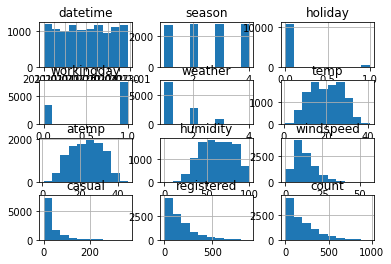

In [114]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [115]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [116]:
test.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

In [117]:
# create a new feature
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day

In [118]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19


In [119]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [124]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
train["day"] = train["day"].astype("category")
train["month"] = train["month"].astype("category")
train["year"] = train["year"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")
test["day"] = test["day"].astype("category")
test["month"] = test["month"].astype("category")
test["year"] = test["year"].astype("category")

In [125]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1


In [126]:
train.dtypes

datetime      datetime64[ns]
season              category
holiday                int64
workingday             int64
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                category
month               category
day                 category
dtype: object

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>],
       [<AxesSubplot:title={'center':'count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

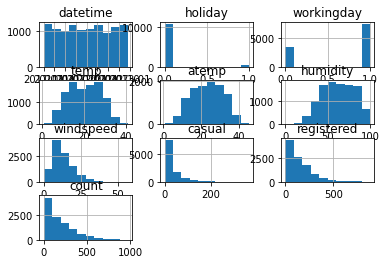

In [127]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [128]:
predictor_new_features = TabularPredictor(label="count", eval_metric="r2").fit(
    train_data=train.loc[:,~train.columns.isin(["casual","registered"])],
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_095333/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_095333/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.915370      13.930161  512.287579                0.000940           0.347924            3       True         14
1   RandomForestMSE_BAG_L2   0.914478       9.901630  423.092150                0.613142          27.329919            2       True         12
2          LightGBM_BAG_L2   0.908491       9.575847  419.285929                0.287359          23.523698            2       True         11
3          CatBoost_BAG_L2   0.903461       9.398489  451.004329                0.110000          55.242098            2       True         13
4        LightGBMXT_BAG_L2   0.886678      13.028721  461.086038                3.740233          65.323807            2       True         10
5    KNeighborsDist_BAG_L1   0.784305       0.043617    0.032068                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6857197008702899,
  'KNeighborsDist_BAG_L1': 0.7843047406609882,
  'LightGBMXT_BAG_L1': 0.4787134732298549,
  'LightGBM_BAG_L1': 0.47955723405561856,
  'RandomForestMSE_BAG_L1': 0.58580

In [129]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    22.539511
1    42.268009
2    45.635773
3    49.076370
4    51.470360
Name: count, dtype: float32

In [130]:
predictions_new_features.describe()

count    6493.000000
mean      101.242966
std        89.219742
min         3.388091
25%        22.612808
50%        63.231373
75%       166.465393
max       365.214874
Name: count, dtype: float64

In [131]:
predictions_new_features.iloc[predictions_new_features<0] = 0
predictions_new_features.lt(0).value_counts()

False    6493
Name: count, dtype: int64

In [132]:
# Same submitting predictions
submission_new_features=pd.read_csv("submission_new_features.csv")
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [133]:
submission_new_features=pd.read_csv("submission_new_features.csv")
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,22.539510
1,2011-01-20 01:00:00,42.268010
2,2011-01-20 02:00:00,45.635773
3,2011-01-20 03:00:00,49.076370
4,2011-01-20 04:00:00,51.470360


In [134]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 398kB/s]
Successfully submitted to Bike Sharing Demand

In [165]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo_3.csv     2023-01-08 10:45:50  new features with hyperparameters-3  complete  1.75705      1.75705       
submission_new_hpo_2.csv     2023-01-08 10:30:38  new features with hyperparameters-2  complete  1.86412      1.86412       
submission_new_hpo.csv       2023-01-08 10:25:12  new features with hyperparameters    complete  1.77666      1.77666       
submission_new_features.csv  2023-01-08 10:05:58  new features                         complete  1.75603      1.75603       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [138]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="r2").fit(
    train_data=train.loc[:,~train.columns.isin(["casual","registered"])],
    time_limit=600,
    num_bag_folds=5,
    num_bag_sets=1,
    num_stack_levels=1,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_101126/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_101126/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

In [139]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.915237      10.394695  520.419586                0.000880           0.301577            3       True         16
1   RandomForestMSE_BAG_L2   0.913798       9.438369  413.662398                0.597564          29.006069            2       True         13
2     ExtraTreesMSE_BAG_L2   0.910828       9.434274  393.608647                0.593470           8.952317            2       True         15
3          LightGBM_BAG_L2   0.906535       9.093247  399.279960                0.252443          14.623631            2       True         12
4          CatBoost_BAG_L2   0.905647       8.950339  467.535991                0.109534          82.879662            2       True         14
5        LightGBMXT_BAG_L2   0.877672      13.022875  424.244051                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6857197008702899,
  'KNeighborsDist_BAG_L1': 0.7843047406609882,
  'LightGBMXT_B

In [136]:
test.dtypes

datetime      datetime64[ns]
season              category
holiday                int64
workingday             int64
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
year                category
month               category
day                 category
dtype: object

In [141]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    22.409016
1    42.422291
2    45.708164
3    48.742424
4    51.848358
Name: count, dtype: float32

In [142]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("submission_new_hpo.csv")
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [143]:
submission_new_hpo = pd.read_csv("submission_new_hpo.csv")
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,22.409016
1,2011-01-20 01:00:00,42.422290
2,2011-01-20 02:00:00,45.708164
3,2011-01-20 03:00:00,48.742424
4,2011-01-20 04:00:00,51.848360


In [144]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 342kB/s]
Successfully submitted to Bike Sharing Demand

#### New Score of `?`

In [145]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-08 10:25:12  new features with hyperparameters    complete  1.77666      1.77666       
submission_new_features.csv  2023-01-08 10:05:58  new features                         complete  1.75603      1.75603       
submission.csv               2023-01-08 09:41:23  first raw submission                 complete  1.79797      1.79797       
submission_new_hpo_3.csv     2023-01-08 08:58:36  new features with hyperparameters-3  complete  1.78912      1.78912       


In [147]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="r2").fit(
    train_data=train.loc[:,~train.columns.isin(["casual","registered"])],
    time_limit=600,
    num_bag_folds=0,
    num_bag_sets=20,
    num_stack_levels=0,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_102630/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_102630/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

[1000]	valid_set's l2: 17785.9	valid_set's r2: 0.467589
[2000]	valid_set's l2: 17581.6	valid_set's r2: 0.473717
[3000]	valid_set's l2: 17581.2	valid_set's r2: 0.473774


	0.4753	 = Validation score   (r2)
	6.46s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 592.32s of the 592.32s of remaining time.
	0.4801	 = Validation score   (r2)
	2.01s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 590.1s of the 590.09s of remaining time.
	0.5523	 = Validation score   (r2)
	10.03s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 577.78s of the 577.78s of remaining time.
	0.4561	 = Validation score   (r2)
	61.35s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 516.28s of the 516.27s of remaining time.
	0.507	 = Validation score   (r2)
	4.68s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 509.38s of the 509.37s of remaining time.
	0.4533	 = Validation score   (r2)
	12.51

In [148]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        KNeighborsDist   0.744221       0.007908   0.017867                0.007908           0.017867            1       True          2
1   WeightedEnsemble_L2   0.744221       0.008400   0.380850                0.000492           0.362983            2       True         12
2        KNeighborsUnif   0.639545       0.011110   0.028635                0.011110           0.028635            1       True          1
3       RandomForestMSE   0.552256       0.154693  10.025480                0.154693          10.025480            1       True          5
4         ExtraTreesMSE   0.506987       0.169901   4.683877                0.169901           4.683877            1       True          7
5         LightGBMLarge   0.484611       0.045451   2.776751                0.045451           2.776751 

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.6395447258765232,
  'KNeighborsDist': 0.7442206313772077,
  'LightGBMXT': 0.4752539154016644,
  'LightGBM': 0.48013160195009386,
  'RandomForestMSE': 0.5522559886727701,
  'CatBoost': 0.456135156583804,
  'ExtraTreesMSE': 0.5069868671160374,
  'NeuralNetFastAI': 0.45334709924523453,
  'XGBoost': 0.4600416658641776,
  'NeuralNetTorch': 0.4165057458848799,
  'LightGBMLarge': 0.48461059437774623,
  'WeightedEnsemble_L2': 0.7442206313772077},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'Autogluo

In [149]:
predictions_new_hpo_2 = predictor_new_hpo.predict(test)
predictions_new_hpo_2.head()

0    51.861626
1    56.686295
2    59.077763
3    60.468830
4    61.419930
Name: count, dtype: float32

In [151]:
submission_new_hpo = pd.read_csv("submission_new_hpo_2.csv")
submission_new_hpo["count"] = predictions_new_hpo_2
submission_new_hpo.to_csv("submission_new_hpo_2.csv", index=False)

In [152]:
submission_new_hpo = pd.read_csv("submission_new_hpo_2.csv")
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,51.861626
1,2011-01-20 01:00:00,56.686295
2,2011-01-20 02:00:00,59.077763
3,2011-01-20 03:00:00,60.468830
4,2011-01-20 04:00:00,61.419930


In [153]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_2.csv -m "new features with hyperparameters-2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 333kB/s]
Successfully submitted to Bike Sharing Demand

In [154]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo_2.csv     2023-01-08 10:30:38  new features with hyperparameters-2  complete  1.86412      1.86412       
submission_new_hpo.csv       2023-01-08 10:25:12  new features with hyperparameters    complete  1.77666      1.77666       
submission_new_features.csv  2023-01-08 10:05:58  new features                         complete  1.75603      1.75603       
submission.csv               2023-01-08 09:41:23  first raw submission                 complete  1.79797      1.79797       


In [155]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="r2").fit(
    train_data=train.loc[:,~train.columns.isin(["casual","registered"])],
    time_limit=600,
    num_bag_folds=10,
    num_bag_sets=20,
    num_stack_levels=3,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_103157/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=10, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_103157/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [157]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L4   0.915308      16.249406  468.805894                0.001008           0.327559            4       True         17
1      WeightedEnsemble_L3   0.914600      10.998120  252.990866                0.000703           0.249204            3       True         12
2          CatBoost_BAG_L3   0.914568      15.493274  420.225329                0.132890          53.047369            3       True         16
3   RandomForestMSE_BAG_L2   0.913368      10.699308  221.507641                0.618332          25.545606            2       True         10
4          LightGBM_BAG_L3   0.913086      15.498424  393.074452                0.138041          25.896492            3       True         14
5      WeightedEnsemble_L5   0.912086      17.388081  570.674702                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L3': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L3': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L3': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L4': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L4': 'StackerEnsembleModel_LGB'

In [158]:
predictions_new_hpo_3 = predictor_new_hpo.predict(test)
predictions_new_hpo_3.head()

0    26.770630
1    42.608307
2    43.065819
3    49.712025
4    52.320023
Name: count, dtype: float32

In [160]:
submission_new_hpo = pd.read_csv("submission_new_hpo_3.csv")
submission_new_hpo["count"] = predictions_new_hpo_3
submission_new_hpo.to_csv("submission_new_hpo_3.csv", index=False)

In [161]:
submission_new_hpo = pd.read_csv("submission_new_hpo_3.csv")
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,26.770630
1,2011-01-20 01:00:00,42.608307
2,2011-01-20 02:00:00,43.065820
3,2011-01-20 03:00:00,49.712025
4,2011-01-20 04:00:00,52.320023


In [162]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_3.csv -m "new features with hyperparameters-3"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 385kB/s]
Successfully submitted to Bike Sharing Demand

In [163]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo_3.csv     2023-01-08 10:45:50  new features with hyperparameters-3  complete  1.75705      1.75705       
submission_new_hpo_2.csv     2023-01-08 10:30:38  new features with hyperparameters-2  complete  1.86412      1.86412       
submission_new_hpo.csv       2023-01-08 10:25:12  new features with hyperparameters    complete  1.77666      1.77666       
submission_new_features.csv  2023-01-08 10:05:58  new features                         complete  1.75603      1.75603       


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

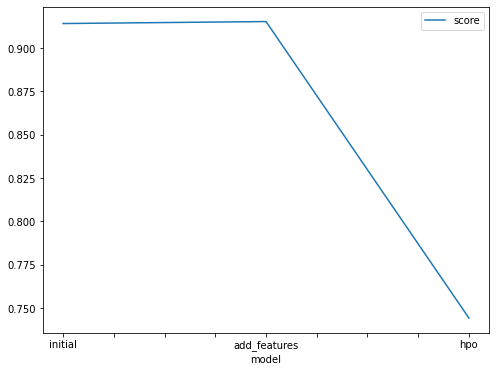

In [168]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [0.914226, 0.915370, 0.744221]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

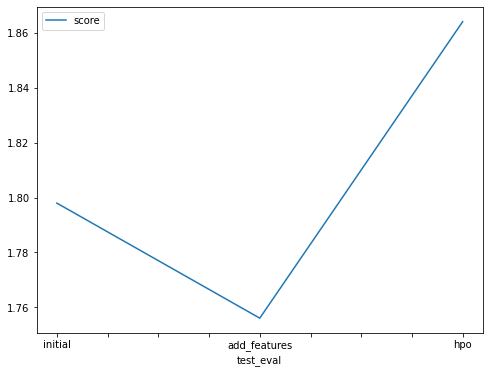

In [167]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79797, 1.75603, 1.86412]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [166]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "num_bag_folds": [0, 0, 0],
    "num_bag_sets": [1, 1, 20],
    "num_stack_levels": [0, 0, 0],
    "score": [1.79797, 1.75603, 1.86412]
})

,model,num_bag_folds,num_bag_sets,num_stack_levels,score
0,initial,0,1,0,1.79797
1,add_features,0,1,0,1.75603
2,hpo,0,20,0,1.86412
